<a href="https://colab.research.google.com/github/rdharini2001/Marketing_Campaign/blob/master/Marketing_Campaign_for_Banking_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Marketing Campaign for Bank Products**

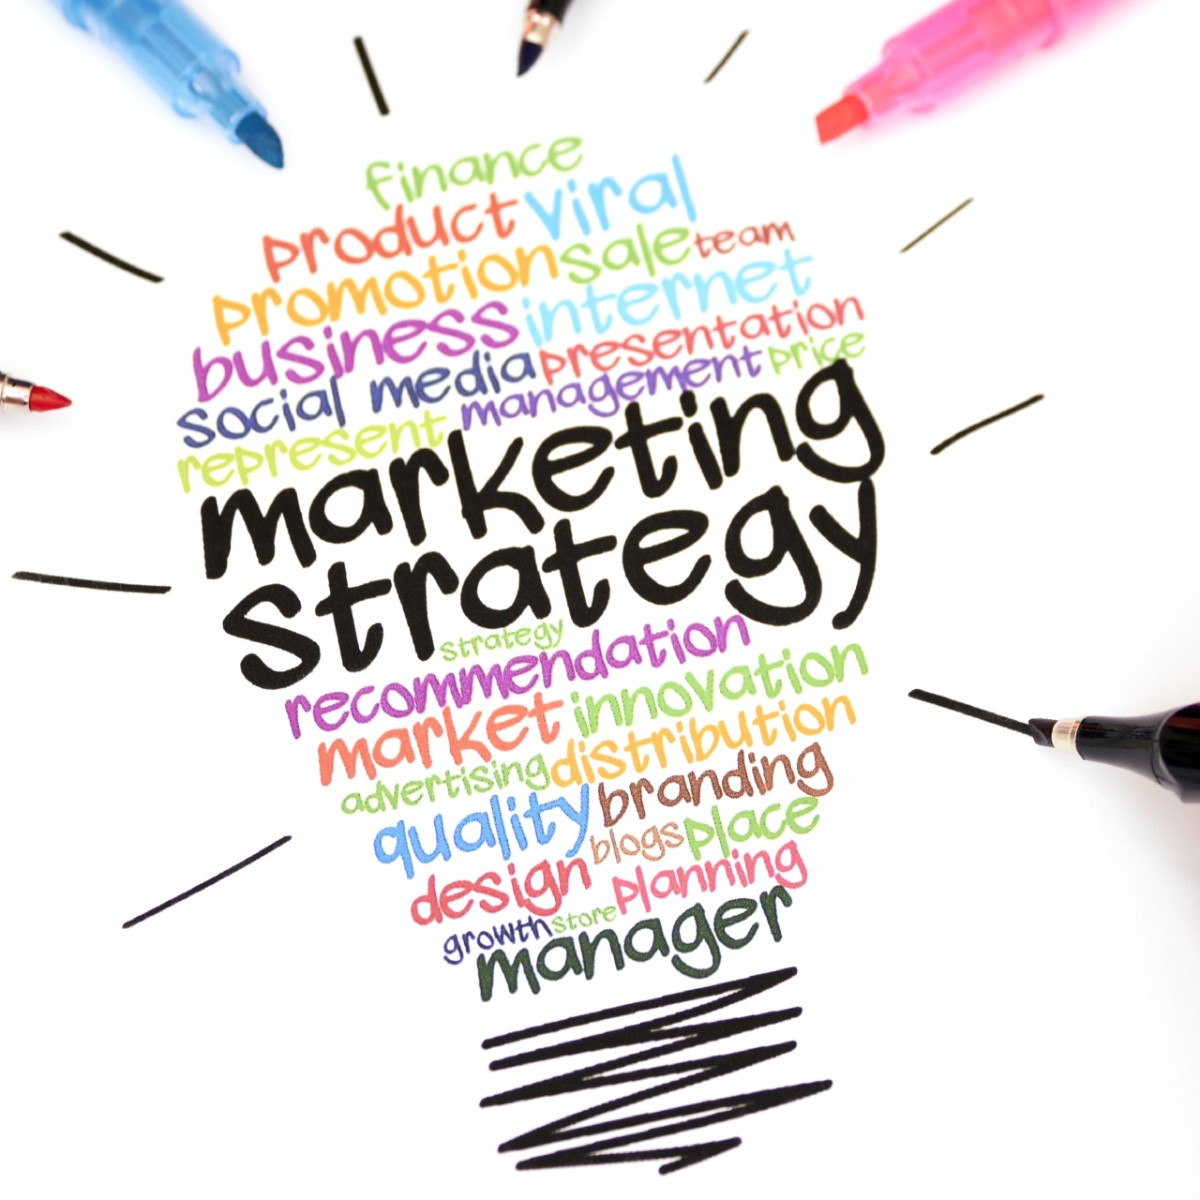

**1. Import the datasets and libraries, check datatype, statistical summary shape, null values etc**

In [2]:
#uploading the dataset in the form of a CSV file
from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data.csv


In [3]:
import numpy as np #importing numpy library for numerical analysis
import pandas as pd #importing pandas library for converting CSV file to dataframe format
import matplotlib.pyplot as plt #importing matplotlib for data visualization
import io
import seaborn as sns #importing seaborn for data visualization
data = pd.read_csv("Data.csv") #reading the dataset and storing it in a variable called 'data'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data.head() #printing the first five rows of the dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.info() #showing a concise summary of all columns of the dataset. It shows number of non null values and also the data type each column holds.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data.describe() #showing statistical summary of the dataframe. Computing mean, standard deviation, maximum values, minimum values and total number of values 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
data.isnull().sum() #checking for sum of all null values in each of the columns

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**2. Check if you need to clean the data for any of the variables**

In [8]:
correlation = data['Experience'].corr(data['Age']) #finding highly correlated columns from the dataset.
print(correlation)

0.9942148569683321


In [9]:
data_cleaned = data.drop(['ID','Experience'],axis = 1) #dropping the highly correlated columns and the columns which are of no use in determining the output. Here columns being dropped are ID and Experience.
data_cleaned.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


**3. EDA: Study the data distribution in each attribute and target variable, share your findings**
● Number of unique in each column? 
● Number of people with zero mortgage?
● Number of people with zero credit card spending per month?
● Value counts of all categorical columns.
● Univariate and Bivariate analysis 

In [10]:
data.nunique() #Finding the number of unique values in each of the columns.

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [11]:
data_new = data_cleaned.drop('ZIP Code',axis = 1) #Dropping ZIP Code as it has too many unique values which might cause anamolies in the model.
data_new

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [12]:
(data_new.Mortgage == 0).sum() #Number of people with zero mortgage

3462

In [13]:
(data_new.CCAvg == 0).sum() # Number of people with zero credit card spending per month

106

**value_counts() for each categorical column**

In [14]:
data_new.Education.value_counts() 

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [15]:
data_new.Mortgage.value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [16]:
data_new['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [17]:
data_new['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [18]:
data_new['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [19]:
data_new.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [20]:
data_new.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

**Univariate Analysis**

**Variation of Age using Kernel Density Estimate Plot**

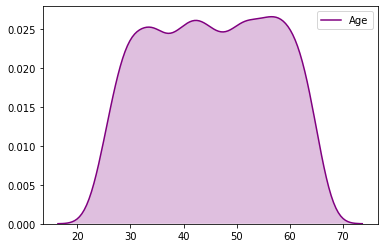

In [21]:
sns.kdeplot(data = data_new['Age'],shade = True,color = 'Purple')

**Variation of Income using Kernel Density Estimate Plot**

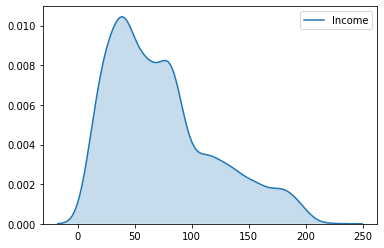

In [22]:
sns.kdeplot(data = data_new['Income'],shade = True)

**Variation of Credit Card Average using dist plot**

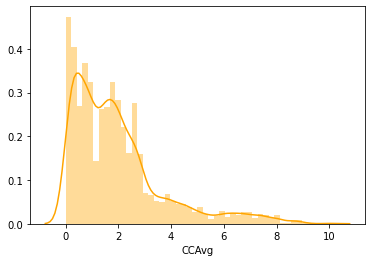

In [23]:
sns.distplot(a = data_new['CCAvg'],color = 'Orange')

**Variation of Education using count plot**

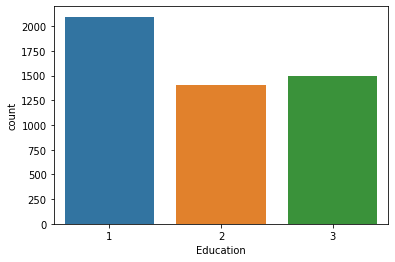

In [24]:
sns.countplot(x = data_new['Education'])

**Variation of Family using dist plot**

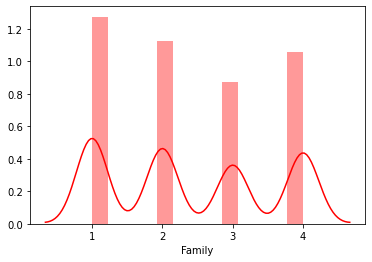

In [25]:
sns.distplot(a = data_new['Family'],color = 'Red')

**Variation of Online Parameter using dist plot**

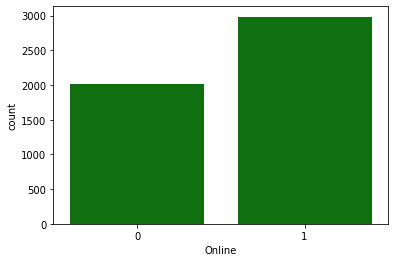

In [26]:
sns.countplot(x = data_new['Online'],color = 'Green')

**Variation of Mortgage using Kernel Density Analysis**

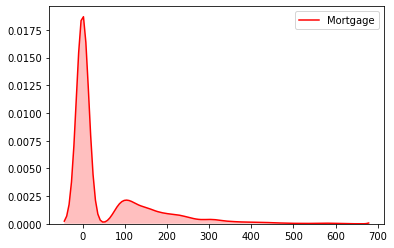

In [27]:
sns.kdeplot(data = data_new['Mortgage'],shade = True,color = 'Red')

**Variation of Personal Loan using dist plot**

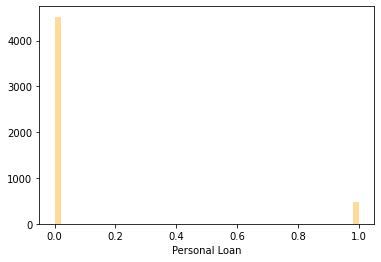

In [28]:
sns.distplot(a = data_new['Personal Loan'],kde = False,color = 'Orange')

**Variation of Securities Account using count plot**

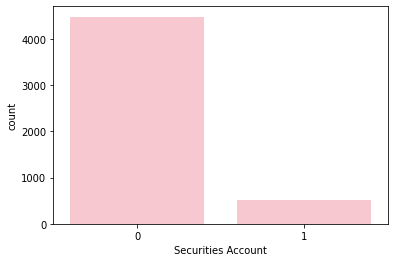

In [29]:
sns.countplot(x = data_new['Securities Account'],color = 'Pink')

**Variation of Credit Card using dist plot**

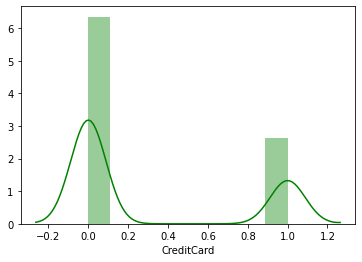

In [30]:
sns.distplot(a = data_new['CreditCard'],color = 'Green')

**Variation of CD Account using count plot**

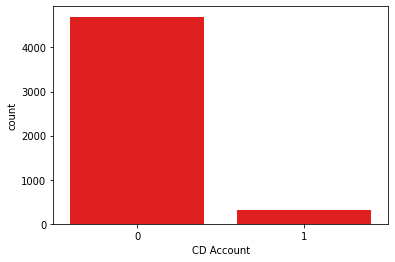

In [31]:
sns.countplot(x = data_new['CD Account'],color = 'Red')

**Bivariate Analysis**

**Variation of Eduaction vs Mortgage using Box Plot**

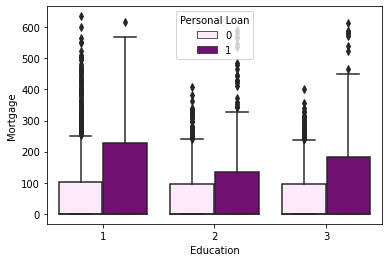

In [32]:
sns.boxplot(x = data_new['Education'],y = data_new['Mortgage'],hue = 'Personal Loan',data = data_new,color = 'Purple')

**Variation of Securities Account using count plot**

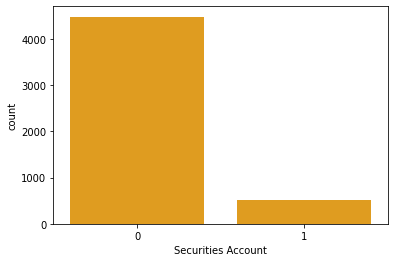

In [33]:
sns.countplot(x = data_new['Securities Account'],data = data_new, color = 'Orange')

**Heat Map**

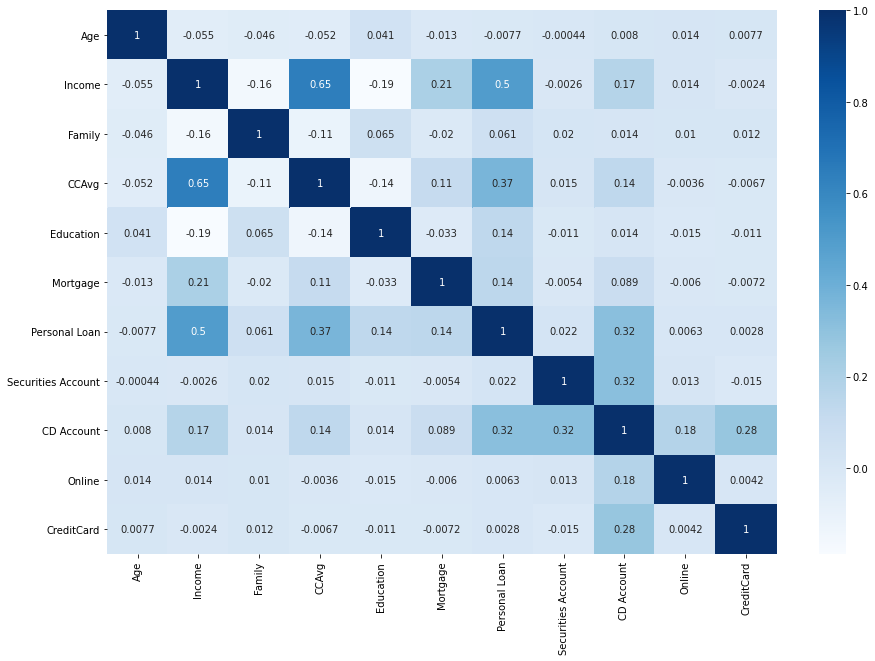

In [34]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_new.corr(),cmap = 'Blues',annot = True)

**Pair Wise Plot**

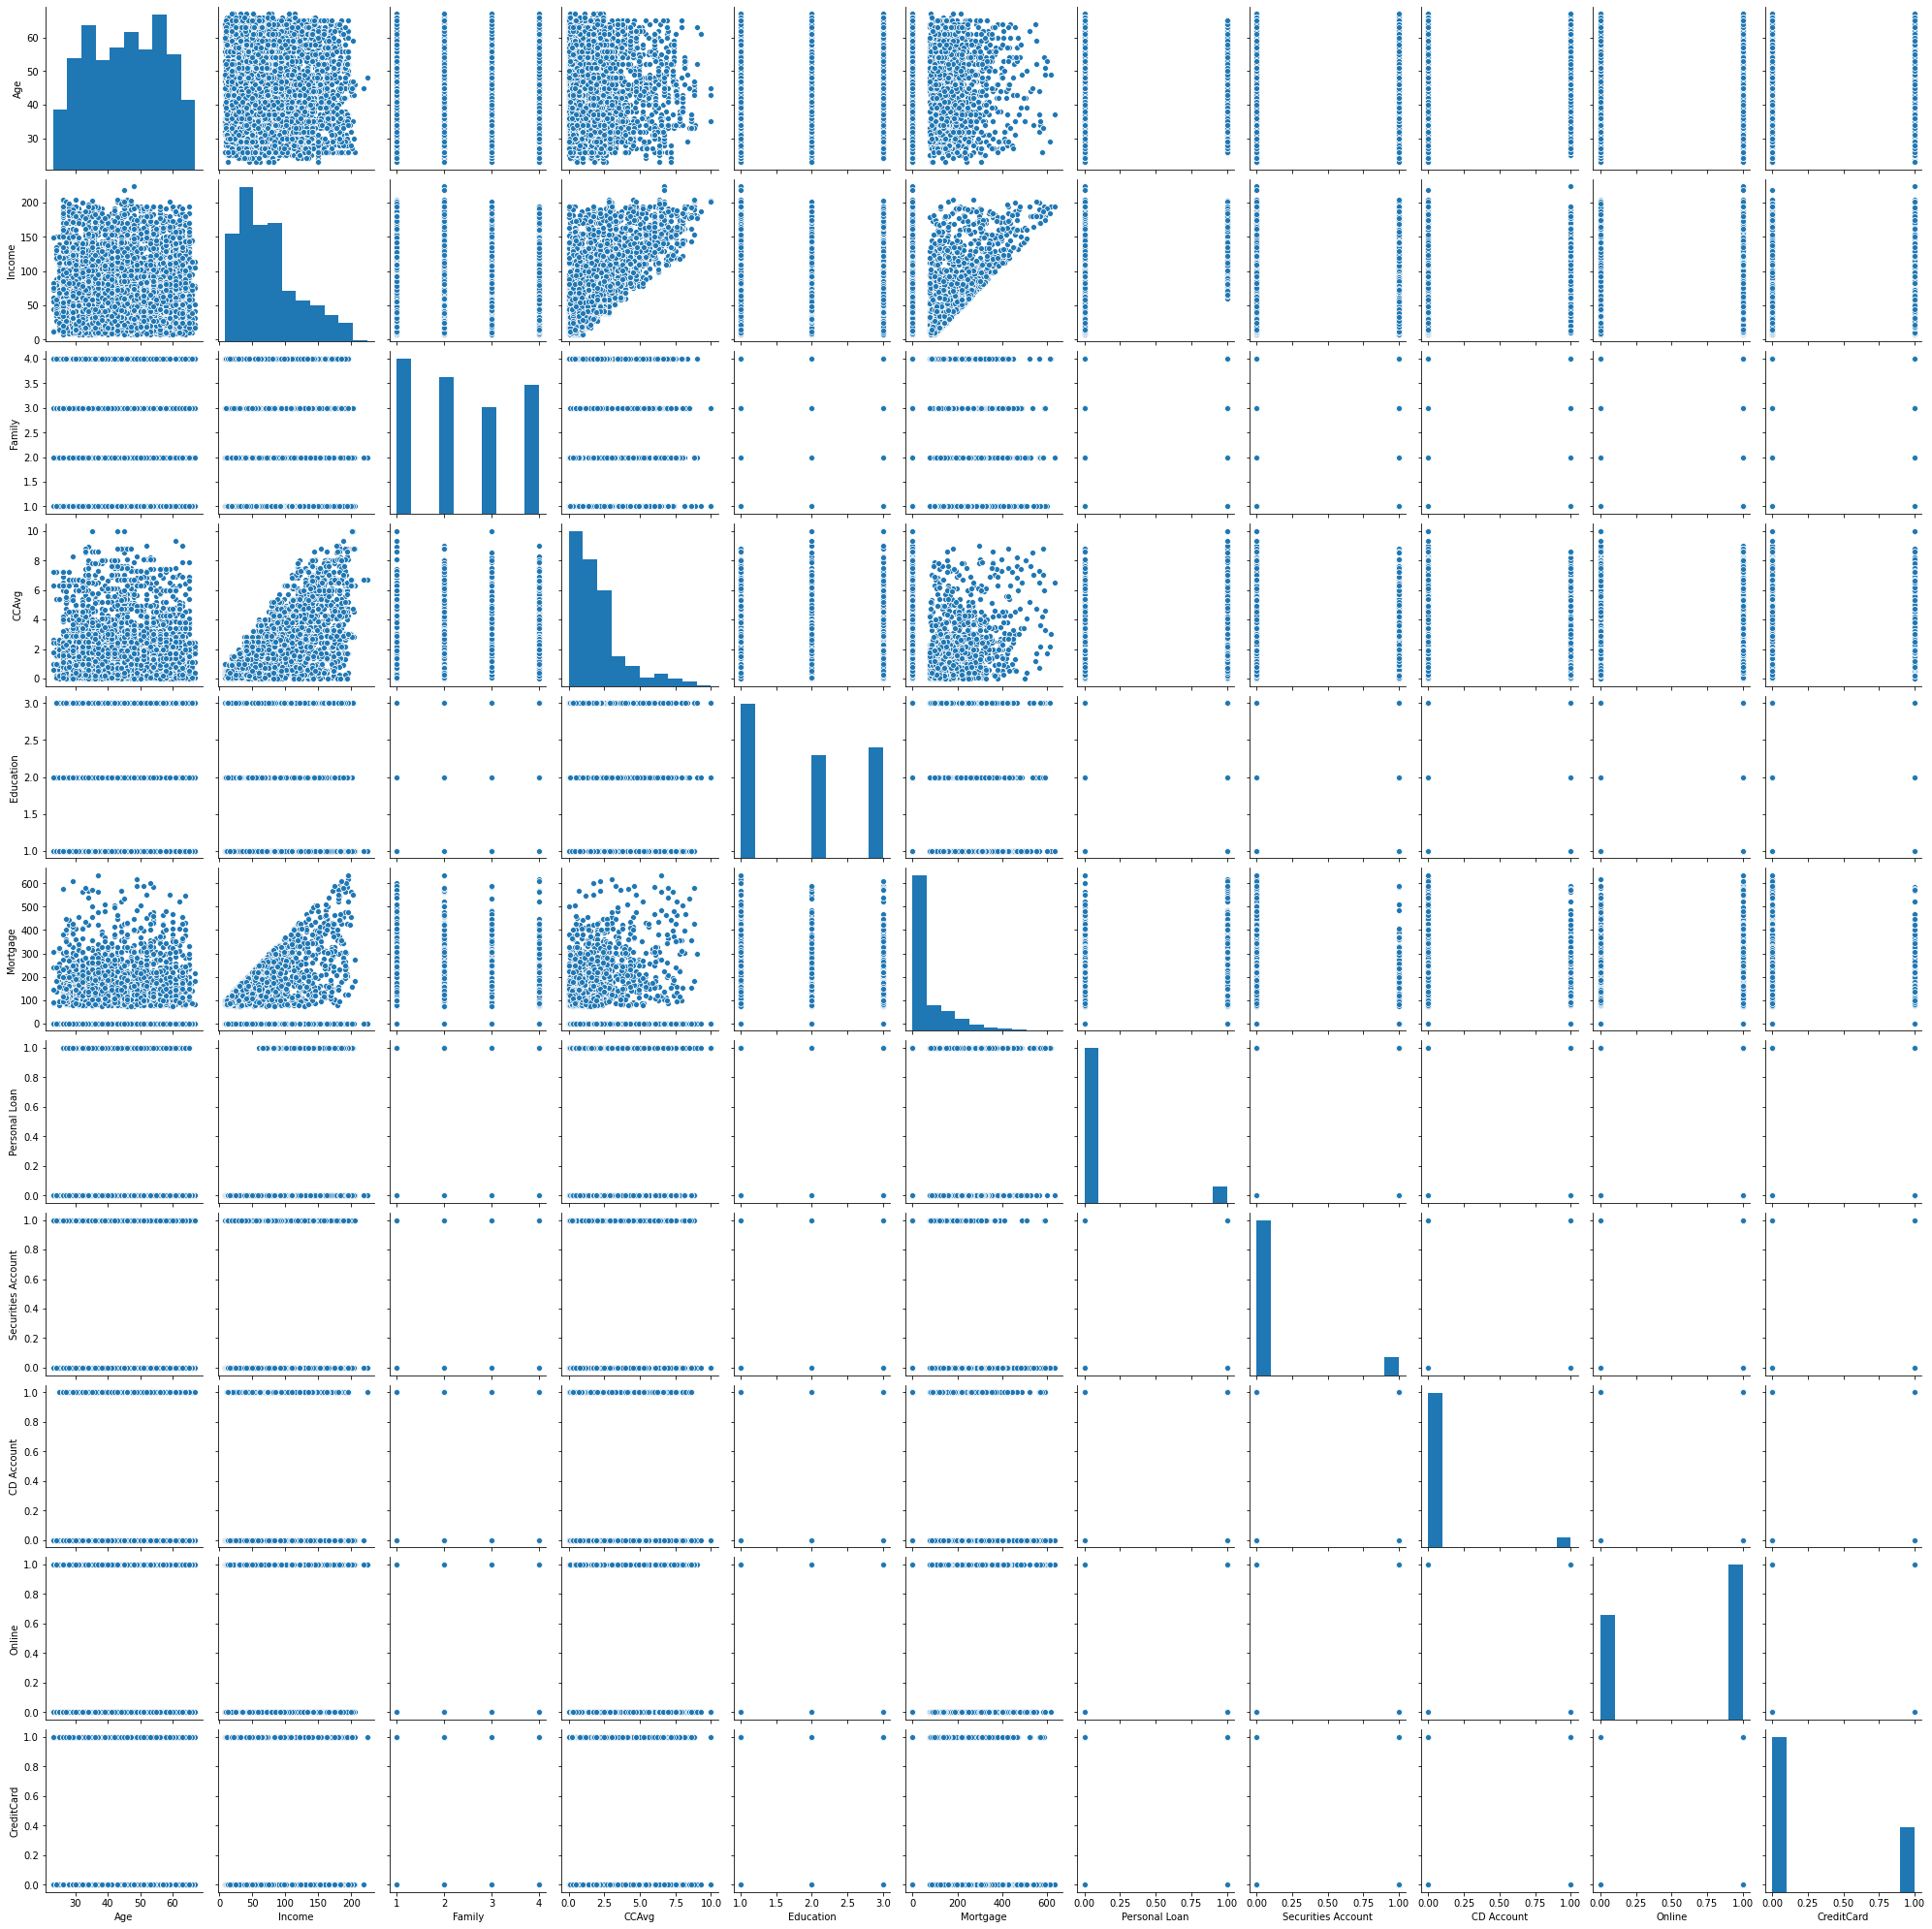

In [35]:
sns.pairplot(data_new)

**4. Apply necessary transformations for the feature variables**

In [36]:
data_new_X = data_new.loc[:,data_new.columns!='Personal Loan']
data_new_Y = data_new[['Personal Loan']]

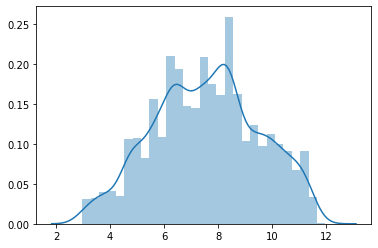

In [37]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method = 'yeo-johnson',standardize = False)
power.fit(data_new_X['Income'].values.reshape(-1,1))
temp = power.transform(data_new_X['Income'].values.reshape(-1,1))
sns.distplot(temp)

In [38]:
data_new_X['Mortgage_Int'] = pd.cut(data_new_X['Mortgage'],bins = [0,100,200,300,400,500,600,700],labels = [0,1,2,3,4,5,6],include_lowest = True)
data_new_X.drop("Mortgage",axis = 1,inplace = True)

In [39]:
data_new_X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,49,4,1.6,1,1,0,0,0,0
1,45,34,3,1.5,1,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,1,0


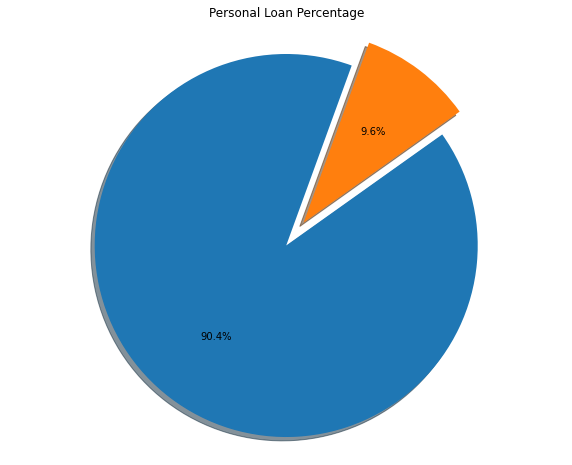

In [40]:
temporary_DF = pd.DataFrame(data_new['Personal Loan'].value_counts()).reset_index()
temporary_DF.columns = ['Labels','Personal Loan']
fig1,ax1 = plt.subplots(figsize = (10,8))
explode = (0,0.15)
ax1.pie(temporary_DF['Personal Loan'],explode = explode,autopct = '%1.1f%%',shadow = True,startangle = 70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()



**5. Normalise your data and split the data into training and test set in the ratio of 70:30 respectively**

**Splitting Data into Training and Test**

In [41]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(data_new_X,data_new_Y,test_size = 0.3,stratify = data_new_Y,random_state = 0)

**6. Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.**


**Model Building - Logistic Regression**

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data_new['Personal Loan'] = encode.fit_transform(data_new['Personal Loan'])
np_train_X = train_X.values
np_train_Y = train_Y.values
np_test_X = test_X.values
np_test_Y = test_Y.values
model = LogisticRegression()
model.fit(np_train_X,np_train_Y)
predict_train = model.predict(np_train_X)
predict_test = model.predict(np_test_X)
print("The predicted value for Logistic Regression on train data is",encode.inverse_transform(predict_train))
print("The predicted value for Logistic Regression on test data is",encode.inverse_transform(predict_test))
accuracy_train =  accuracy_score(np_train_Y,predict_train)
accuracy_test =  accuracy_score(np_test_Y,predict_test)
print("The accuracy of the model is",accuracy_train)
print("The accuracy of the model is",accuracy_test)


The predicted value for Logistic Regression on train data is [0 0 0 ... 0 0 0]
The predicted value for Logistic Regression on test data is [1 0 0 ... 0 0 0]
The accuracy of the model is 0.9497142857142857
The accuracy of the model is 0.9453333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**7. Print all the metrics related for evaluating the model performance**

**Evaluation Metric - Confusion Matrix**

[[3119   45]
 [ 131  205]]


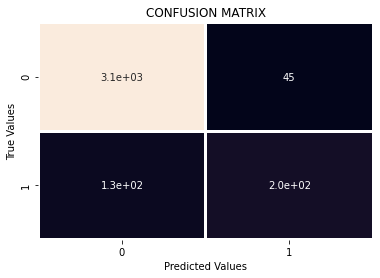

In [46]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(np_train_Y,predict_train,labels = [0,1]))
sns.heatmap(confusion_matrix(np_train_Y,predict_train),annot = True,lw = 2,cbar = False)
plt.ylabel('True Values')
plt.xlabel('Predicted Values on Train Data')
plt.title("CONFUSION MATRIX")
plt.show()

[[1331   25]
 [  57   87]]


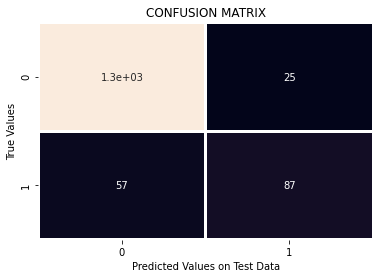

In [47]:
print(confusion_matrix(np_test_Y,predict_test,labels = [0,1]))
sns.heatmap(confusion_matrix(np_test_Y,predict_test),annot = True,lw = 2,cbar = False)
plt.ylabel('True Values')
plt.xlabel('Predicted Values on Test Data')
plt.title("CONFUSION MATRIX")
plt.show()

**Evaluation Metric - F1 Score**

In [50]:
from sklearn.metrics import f1_score
print("F1 SCORE ON TRAIN DATA",f1_score(np_train_Y,predict_train))
print("F1 SCORE ON TEST DATA",f1_score(np_test_Y,predict_test))

F1 SCORE ON TRAIN DATA 0.6996587030716723
F1 SCORE ON TEST DATA 0.6796875


**Classification Report**

In [53]:
from sklearn.metrics import classification_report
print("TRAIN DATA",classification_report(np_train_Y,predict_train))
print("TEST DATA",classification_report(np_test_Y,predict_test))

TRAIN DATA               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3164
           1       0.82      0.61      0.70       336

    accuracy                           0.95      3500
   macro avg       0.89      0.80      0.84      3500
weighted avg       0.95      0.95      0.95      3500

TEST DATA               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.78      0.60      0.68       144

    accuracy                           0.95      1500
   macro avg       0.87      0.79      0.82      1500
weighted avg       0.94      0.95      0.94      1500



**Evaluation Metric - Log Loss**

In [55]:
from sklearn.metrics import log_loss
print("LOG LOSS ON TRAIN DATA",log_loss(np_train_Y,predict_train))
print("LOG LOSS ON TEST DATA",log_loss(np_test_Y,predict_test))

LOG LOSS ON TRAIN DATA 1.7368173221110406
LOG LOSS ON TEST DATA 1.888133102878955


**8. Build various other classification algorithms and compare their performance**

**Decision Tree Classifier**

In [59]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(np_train_X,np_train_Y)
predict_tree_train = model_tree.predict(np_train_X)
print("Predicted value for Decision Tree Classifier for Train Data",predict_tree_train)
accuracy_tree_test = accuracy_score(np_train_Y,predict_tree_train)
print("Accuracy of Decision Tree Classifier of Train Data is",accuracy_tree_train)
predict_tree_test = model_tree.predict(np_test_X)
print("Predicted value for Decision Tree Classifier for Test Data",predict_tree_test)
accuracy_tree_test = accuracy_score(test_Y,predict_tree_test)
print("Accuracy of Decision Tree Classifier of Test Data is",accuracy_tree_test)

Predicted value for Decision Tree Classifier for Train Data [0 0 0 ... 0 0 0]
Accuracy of Decision Tree Classifier of Train Data is 1.0
Predicted value for Decision Tree Classifier for Test Data [1 0 0 ... 0 0 0]
Accuracy of Decision Tree Classifier of Test Data is 0.9833333333333333


**Support Vector Machine Classifier**

In [60]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(np_train_X,np_train_Y)
predict_svm_train = model_svm.predict(np_train_X)
print("Predicted value for Support Vector Machines for Train data is",predict_svm_train)
accuracy_svm_train = accuracy_score(np_train_Y,predict_svm_train)
print("Accuracy of Support Vector Machines for Train data is",accuracy_svm_train)
predict_svm_test = model_svm.predict(np_test_X)
print("Predicted value for Support Vector Machines for Test data is",predict_svm_test)
accuracy_svm_test = accuracy_score(np_test_Y,predict_svm_test)
print("Accuracy of Support Vector Machines for Test data is",accuracy_svm_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted value for Support Vector Machines for Train data is [0 0 0 ... 0 0 0]
Accuracy of Support Vector Machines for Train data is 0.9048571428571428
Predicted value for Support Vector Machines for Test data is [0 0 0 ... 0 0 0]
Accuracy of Support Vector Machines for Test data is 0.9046666666666666


**Naive Bayes Classifier**

In [61]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(np_train_X,np_train_Y)
predict_naive_train = model_naive.predict(np_train_X)
print("Predicted value for Naive Bayes for Train data is",predict_naive_train)
accuracy_naive_train = accuracy_score(np_train_Y,predict_naive_train)
print("Accuracy of Naive Bayes for Train data is",accuracy_naive_train)
predict_naive_test = model_naive.predict(np_test_X)
print("Predicted value for Naive Bayes for Test data is",predict_naive_test)
accuracy_naive_test = accuracy_score(np_test_Y,predict_naive_test)
print("Accuracy of Naive Bayes for Test data is",accuracy_naive_test)


Predicted value for Naive Bayes for Train data is [0 0 0 ... 0 0 0]
Accuracy of Naive Bayes for Train data is 0.8805714285714286
Predicted value for Naive Bayes for Test data is [1 0 0 ... 0 0 0]
Accuracy of Naive Bayes for Test data is 0.8873333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**K Nearest Neighbors**

In [62]:
from sklearn.neighbors import KNeighborsClassifier
model_neighbor = KNeighborsClassifier()
model_neighbor.fit(np_train_X,np_train_Y)
predict_neighbor_train = model_neighbor.predict(np_train_X)
print("Predicted value for K Nearest Neighbors for Train data is",predict_neighbor_train)
accuracy_neighbor_train = accuracy_score(np_train_Y,predict_neighbor_train)
print("Accuracy of K Nearest Neighbors for Train data is",accuracy_neighbor_train)
predict_neighbor_test = model_neighbor.predict(np_test_X)
print("Predicted value for K Nearest Neighbors for Test data is",predict_neighbor_test)
accuracy_neighbor_test = accuracy_score(np_test_Y,predict_neighbor_test)
print("Accuracy of K Nearest Neighbors for Test data is",accuracy_neighbor_test)



Predicted value for K Nearest Neighbors for Train data is [0 0 0 ... 0 0 0]
Accuracy of K Nearest Neighbors for Train data is 0.9462857142857143
Predicted value for K Nearest Neighbors for Test data is [0 0 0 ... 0 0 0]
Accuracy of K Nearest Neighbors for Test data is 0.9246666666666666


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


**Random Forest Classifier**

In [65]:
from sklearn.ensemble import RandomForestClassifier
model_random = RandomForestClassifier()
model_random.fit(np_train_X,np_train_Y)
predict_random_train = model_random.predict(np_train_X)
print("Predicted value for Random Forest Classifier for Train data is",predict_random_train)
accuracy_random_train = accuracy_score(np_train_Y,predict_random_train)
print("Accuracy of Random Forest Classifier for Train data is",accuracy_random_train)
predict_random_test = model_random.predict(np_test_X)
print("Predicted value for Random Forest Classifier for Test data is",predict_random_test)
accuracy_random_test = accuracy_score(np_test_Y,predict_random_test)
print("Accuracy of Random Forest Classifier for Test data is",accuracy_random_test)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Predicted value for Random Forest Classifier for Train data is [0 0 0 ... 0 0 0]
Accuracy of Random Forest Classifier for Train data is 1.0
Predicted value for Random Forest Classifier for Test data is [1 0 0 ... 0 0 0]
Accuracy of Random Forest Classifier for Test data is 0.9886666666666667


**COMPARING DIFFERENT ALGORITHMS AND PRINTING THEIR ACCURACY SCORES**

In [64]:
print("The accuracy of the model is",accuracy_test)
print("Accuracy of Decision Tree Classifier is",accuracy_tree_test)
print("Accuracy of Support Vector Machines is",accuracy_svm_test)
print("Accuracy of Naive Bayes is",accuracy_naive_test)
print("Accuracy of K Nearest Neighbors is",accuracy_neighbor_test)
print("Accuracy of Random Forest Classifier is",accuracy_random_test)

The accuracy of the model is 0.9453333333333334
Accuracy of Decision Tree Classifier is 0.9833333333333333
Accuracy of Support Vector Machines is 0.9046666666666666
Accuracy of Naive Bayes is 0.8873333333333333
Accuracy of K Nearest Neighbors is 0.9246666666666666
Accuracy of Random Forest Classifier is 0.9886666666666667


**9.Give a business understanding of your model**

Using an appropriate Machine Learning model by identifying the right features is very important for a bank to identify potential customers who will opt for a personal loan by keeping the expenses for campaigns minimum.
This project has drawn important conclusions and insights from the Bank Loan Modelling Dataset. 
First it identifies that columns like ID, ZIP CODE and highly correlated features like EXPERIENCE can have a negative impact on the performance of the model.These features are hence dropped.
Next with the help of Univariate and Bivariate Analysis it was observed that certain features like Age and Family were symmetrical but other features like Credit Card Average and Mortgage were highly skewed. So these features have to be normalised. The banks need to take care of these features accordingly to earn maximum profit.
Next, building an effective classification model is very important. Here Logistic Regression, SVM, Decision Tree Classifier, Naive Bayes, Random Forest Classifier and K Nearest Neighbors. It was found that Random Forest Classifier gave the maximum accuracy of 0.9886666666666667. This is not the only way to decide the best model.
Other evaluation metrics have been used like Confusion Matrix, Log Loss, F1 Score and Classification Report. All these metrics have to be taken into account by the bank and this is how a successful Machine Learning model can be built and profits can be earned.
